# import all necessary libraries

In [98]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# reading our file

In [91]:
df=pd.read_csv('F:/Data Science projects/by_me/indiantrains/All_Indian_Trains.csv')
df.columns

Index(['Unnamed: 0', 'Train no.', 'Train name', 'Starts', 'Ends'], dtype='object')

In [3]:
df.head()

,Unnamed: 0,Train no.,Train name,Starts,Ends
0,0,12723,Andhra Pradesh Express,Hyderabad Decan,New Delhi
1,1,22416,Andhra Pradesh Express,New Delhi,Vishakapatnam
2,2,12724,Andhra Pradesh Express,New Delhi,Hyderabad Decan
3,3,12707,Andhra Pradesh Sampark Kranti,Tirupati,H Nizamuddin
4,4,15909,Abadh Assam Express,New Tinsukia Junction,Darbhanga Junction


In [46]:
df.shape

(4024, 5)

# Part-1

In [ ]:
total unique trains
entire data of index 0
data of first 5 trains with their train no and train name
calculate all express trains
calc all different express trains

find all special trains
find all different special trains

# total unique trains

In [53]:

len(df['Train name'].unique())

2970

# #entire data of index 0

In [21]:


df.loc[0]
#or by
df.iloc[0]

Unnamed: 0                         0
Train no.                      12723
Train name    Andhra Pradesh Express
Starts               Hyderabad Decan
Ends                       New Delhi
Name: 0, dtype: object

In [23]:
df.loc[0,'Train name']
#df.iloc[0,2]

'Andhra Pradesh Express'

# data of first 5 trains with their train no and train name

In [25]:

df.loc[0:5,'Train no.':'Train name']
#df.loc[[0,1,2,3,4],'Train no.':'Train name']

,Train no.,Train name
0,12723,Andhra Pradesh Express
1,22416,Andhra Pradesh Express
2,12724,Andhra Pradesh Express
3,12707,Andhra Pradesh Sampark Kranti
4,15909,Abadh Assam Express
5,18242,Abkp Durg Passenger E


# calculate all express trains

In [24]:
list1=list(df['Train name'])

#declare a empty list so that we will store all our express trains here
exptrain=[]
for train in list1:
    if 'Express' in train:
        exptrain.append(train)
len(exptrain)        

2397

# calculate all express trains using list comprehension

In [25]:
list1=list(df['Train name'])
len([train for train in list1 if 'Express' in train])

2397

# calc all different express trains

In [26]:
list1=list(df['Train name'])

#declare a empty list so that we will store all our express trains here
exptrain=[]
for train in list1:
    if 'Express' in train:
        exptrain.append(train)
len(set((exptrain)) )

1634

# Same task using List comprehension

In [9]:
list1=list(df['Train name'])
len(set([train for train in list1 if 'Express' in train]))

1634

# # alternate way,find all express trains

In [20]:
df['Train name'].str.contains('Express').sum()

2397

# find all special trains

In [26]:
list1=list(df['Train name'])
special_train=[feature for feature in list1 if 'Special' in feature]
len(special_train)

850

# find all different special trains

In [27]:
list1=list(df['Train name'])
special_train=[feature for feature in list1 if 'Special' in feature]
len(set(special_train))

686

# Part2

In [ ]:
create a func to calc all express trains,special trains

create a func to calc all different express trains,special trains 

Get different different trains and create dataframe of it with their count
#columns are 'typeoftrain' and 'count'

filtering all data where train is intercity express

5 source stations with max frequency of a train

10 end stations with max frequency of a train

filtering all data where train starts from howrah junction

# now using function

# create a func to calc all express trains¶

In [39]:
def count(col_name,keyword):
    list1=list(df[col_name])
    return (len([feature for feature in list1 if keyword in feature]))

In [31]:
count('Train name','Express')

2397

In [40]:
count('Train name','Passenger')

157

# create a func to calc all different express trains 

In [33]:
def countdiff(col_name,keyword):
    list1=list(df[col_name])
    return (len(set([feature for feature in list1 if keyword in feature])))
    

In [34]:
countdiff('Train name','Express')

1634

In [32]:
count('Train name','Special')

850

In [35]:
countdiff('Train name','Special')

686

In [37]:
countdiff('Train name','special')

2

In [83]:
'Andhra Pradesh Express'.split(' ')[-1]

'Pradesh'

# Get different different trains ie their types

In [65]:
def split(x):
    return x.split()[-1]

In [66]:
df['type']=df['Train name'].apply(split)

In [69]:
df.head()

,Unnamed: 0,Train no.,Train name,Starts,Ends,type
0,0,12723,Andhra Pradesh Express,Hyderabad Decan,New Delhi,Express
1,1,22416,Andhra Pradesh Express,New Delhi,Vishakapatnam,Express
2,2,12724,Andhra Pradesh Express,New Delhi,Hyderabad Decan,Express
3,3,12707,Andhra Pradesh Sampark Kranti,Tirupati,H Nizamuddin,Kranti
4,4,15909,Abadh Assam Express,New Tinsukia Junction,Darbhanga Junction,Express


In [72]:
len(df[df['type']=='Express'])

2393

In [74]:
df['type'].unique()

array(['Express', 'Kranti', 'E', 'Passenger', 'Passengr', 'Special',
       'Intercity', 'Premium', 'Deck', 'Rajdhani', 'Shatabdi', 'Fast',
       'Rath', 'Shatabd', 'Duronto', 'Mail', 'Link', 'Superfast',
       'Jnshtbdi', 'Psgr', 'Sina', 'Rajdhn', 'Janshatabdi', 'Premiu',
       'Doubledecke', 'Psngr', 'Sbcexp', 'Ubl', 'Passenge', 'F',
       'Supfast', 'Inaug', 'Bgktspecial', 'Pg', 'S', 'Inaugra',
       'Chaurichauraexp', 'Pgr', 'Rajdhni', 'Garibrath', 'Rajex',
       'Janshtbdi', 'Queen', 'Dcke', 'Duront', 'Pa', 'Train', 'Suvidh',
       'Exxpress', 'Intcit', 'Karaikalexp', 'Ersgaribrath', 'Ranee',
       'Janta', 'Garibrathsp', 'Ml', 'K', 'Super', 'Jsh', 'Mai', 'Okhaex',
       'Passgn', 'Rat', 'Krant', 'Delx', 'Jnaneswarisupdl', 'Joyride',
       'Diesel', 'Passnger', 'Dcker', 'Fastpass', 'Suvidha', 'Pgs',
       'Pasenger', 'Jsmspl', 'Safari', 'Psr', 'Kalingautkalexp',
       'Fastpas', 'Exres', 'Acex', 'Gr', 'Kaviguru', 'R', 'Dkr', 'Shtbd',
       'Raj', 'Doubledecker', 'Ldwe

In [42]:
len(df['type'].unique())

129

In [45]:
df['type'].value_counts().nlargest(10)

Express      2393
Special       848
Passenger     150
Premium        83
Intercity      58
Rath           43
Mail           40
Shatabdi       36
E              33
Kranti         28
Name: type, dtype: int64

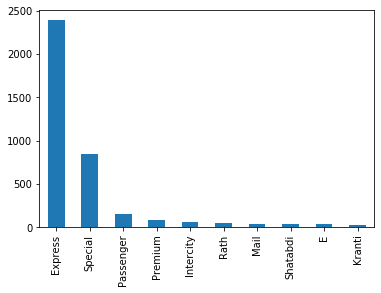

In [46]:
df['type'].value_counts().nlargest(10).plot.bar()

In [9]:
value=df['type'].value_counts()

In [47]:
df2=pd.DataFrame(value)

df2.head()

,type
Express,2393
Special,848
Passenger,150
Premium,83
Intercity,58


In [ ]:
df2['type']

In [11]:
df2.shape

(129, 1)

In [48]:
df2.reset_index(inplace=True)

In [49]:
df2.head()

,index,type
0,Express,2393
1,Special,848
2,Passenger,150
3,Premium,83
4,Intercity,58


In [55]:
df2.rename(columns = {'index': 'typeoftrain','type':'count'},inplace=True)

In [56]:
df2.head()

,typeoftrain,count
0,Express,2393
1,Special,848
2,Passenger,150
3,Premium,83
4,Intercity,58


In [78]:
list1=list(df['Train name'])
len([train for train in list1 if 'Express' in train and 'Superfast' not in train])

2258

In [57]:
df2.dtypes

typeoftrain    object
count           int64
dtype: object

In [58]:
df2.columns

Index(['typeoftrain', 'count'], dtype='object')

In [21]:
df2.to_csv()

',index,type\r\n0,Express,2393\r\n1,Special,848\r\n2,Passenger,150\r\n3,Premium,83\r\n4,Intercity,58\r\n5,Rath,43\r\n6,Mail,40\r\n7,Shatabdi,36\r\n8,E,33\r\n9,Kranti,28\r\n10,Premiu,26\r\n11,Superfast,24\r\n12,Rajdhani,22\r\n13,Duronto,21\r\n14,Deck,10\r\n15,Queen,10\r\n16,Train,9\r\n17,S,8\r\n18,Shatabd,6\r\n19,Pgr,6\r\n20,Duront,6\r\n21,Janshatabdi,6\r\n22,Garibrath,5\r\n23,Pa,5\r\n24,Joyride,4\r\n25,Fast,4\r\n26,Psgr,4\r\n27,Janshtbdi,3\r\n28,Supfast,3\r\n29,Raj,3\r\n30,Intcit,3\r\n31,Fastpass,2\r\n32,Passenge,2\r\n33,Chaurichauraexp,2\r\n34,Pgs,2\r\n35,Punjab,2\r\n36,Jsh,2\r\n37,Shtbd,2\r\n38,Rajdhn,2\r\n39,Intrct,2\r\n40,Yuva,2\r\n41,Garibrat,2\r\n42,Dcke,2\r\n43,Jayanthi,2\r\n44,Ml,2\r\n45,Passengr,2\r\n46,Jnshtbdi,2\r\n47,Safari,2\r\n48,Psgn,2\r\n49,Motor,2\r\n50,Ranee,2\r\n51,Psngr,2\r\n52,Janshatabd,2\r\n53,Link,2\r\n54,Krant,2\r\n55,Dcker,2\r\n56,Rajdhni,2\r\n57,Rajdhaniex,1\r\n58,Tiruchchiexp,1\r\n59,Fastpas,1\r\n60,Li,1\r\n61,Psgnr,1\r\n62,Exxpress,1\r\n63,Pasngr,1\r\n64,Su

In [75]:
df.head()

,Unnamed: 0,Train no.,Train name,Starts,Ends,type
0,0,12723,Andhra Pradesh Express,Hyderabad Decan,New Delhi,Express
1,1,22416,Andhra Pradesh Express,New Delhi,Vishakapatnam,Express
2,2,12724,Andhra Pradesh Express,New Delhi,Hyderabad Decan,Express
3,3,12707,Andhra Pradesh Sampark Kranti,Tirupati,H Nizamuddin,Kranti
4,4,15909,Abadh Assam Express,New Tinsukia Junction,Darbhanga Junction,Express


# 10 end stations with max frequency of a train

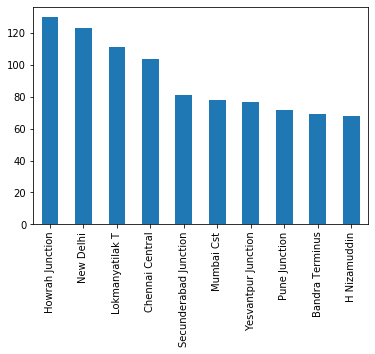

In [7]:
df['Ends'].value_counts().nlargest(10).plot.bar()

# filtering all data where train is intercity express

In [8]:

filt=df['Train name']=='Intercity Express'
df_inter=df[filt]
df_inter.shape

(45, 5)

# 5 source stations with max frequency of a train

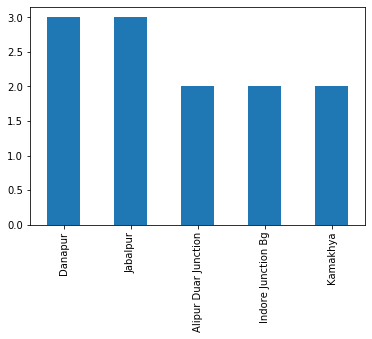

In [9]:

df_inter['Starts'].value_counts().nlargest(5).plot.bar()

# filtering all data where train starts from howrah junction

In [87]:

df_howrah=df[df['Starts']=='Howrah Junction']
df_howrah.head()

,Unnamed: 0,Train no.,Train name,Starts,Ends
50,50,12341,Agnibina Express,Howrah Junction,Asansol Junction
154,154,18047,Amaravathi Express,Howrah Junction,Vasco Da Gama
174,174,13049,Amritsar Express,Howrah Junction,Amritsar Junction
176,176,13005,Amritsar Mail,Howrah Junction,Amritsar Junction
285,285,12130,Azad Hind Express,Howrah Junction,Pune Junction


In [88]:
df_howrah['Starts'].value_counts().nlargest(5)

Howrah Junction    126
Name: Starts, dtype: int64

In [13]:
city=df['Starts'].value_counts().nlargest(10)
city

Howrah Junction          126
New Delhi                120
Lokmanyatilak T          115
Chennai Central           98
Yesvantpur Junction       84
Secunderabad Junction     81
Pune Junction             76
Patna Junction            69
Mumbai Cst                69
Bandra Terminus           67
Name: Starts, dtype: int64

# Part3

In [ ]:
filtering all data where train ends at new delhi
#all trains name whose destination is new delhi,and origin is howrah
#create a function that will grab data where destination is new delhi,and origin is howrah
whose start is either new delhi or mumbai
whose start is either either delhi or mumbai but ends at lucknow
find all trains start from 12 as they are superfast trains

# filtering all data where train ends at new delhi

In [14]:

df_end_delhi=df[df['Ends']=='New Delhi']
df_end_delhi.shape


(123, 5)

In [15]:
df_end_delhi['Starts'].unique()

array(['Hyderabad Decan', 'Ajmer Junction', 'Allahabad Junction',
       'Amritsar Junction', 'Bhubaneswar', 'Mumbai Central', 'Bhagalpur',
       'Darbhanga Junction', 'Barauni Junction', 'Varanasi Junction',
       'Bilaspur Junction', 'Bhatinda Junction', 'Chandigarh',
       'Kanpur Central', 'Dibrugarh', 'Dibrugarh Town', 'Dehradun',
       'Lucknow Nr', 'Chennai Central', 'Howrah Junction', 'Agra Cantt',
       'Bareilly', 'Jammu Tawi', 'Jabalpur', 'Ranchi', 'Jalandhar City',
       'Kalka', 'Bangalore Cy Junction', 'Trivandrum Cntl', 'Kolkata',
       'Kamakhya', 'Ludhiana Junction', 'Lucknow Ne', 'Lal Kuan',
       'Islampur', 'Gaya Junction', 'Madgaon', 'Puri', 'Sealdah',
       'Una Himachal', 'Sainagar Shirdi', 'Shmata V D Ktra', 'Moga',
       'Habibganj', 'Malda Town', 'Naharlagun', 'New Jalpaiguri',
       'Puducherry', 'Patna Junction', 'Guwahati', 'Silchar',
       'Rjndr Ngr Bihar', 'Rohtak Junction', 'Manduadih', 'Rajgir',
       'Ahmedabad Junction', 'Udhampur', 'Vis

# all trains name whose destination is new delhi,and origin is howrah

In [89]:

filt=(df['Starts']=='Howrah Junction') & (df['Ends']=='New Delhi')
df_howrah_delhi=df[filt]
df_howrah_delhi.head()

,Unnamed: 0,Train no.,Train name,Starts,Ends
1452,515,12323,Hwh Ndls Express,Howrah Junction,New Delhi
1453,516,12249,Hwh Ndls Yuva E,Howrah Junction,New Delhi
1987,83,12301,Kolkata Rajdhni,Howrah Junction,New Delhi
1988,84,12305,Kolkata Rajdhani,Howrah Junction,New Delhi
2540,636,12273,Ndls Duronto,Howrah Junction,New Delhi


# #create a function that will grab data where destination is new delhi,and origin is howrah

In [71]:

def dataframe(df,source_name,destination):
    filt=(df['Starts']==source_name) & (df['Ends']==destination)
    df_output=df[filt]
    return (df_output.head())
    

In [73]:
dataframe(df,'Howrah Junction','New Delhi')

,Unnamed: 0,Train no.,Train name,Starts,Ends
1452,515,12323,Hwh Ndls Express,Howrah Junction,New Delhi
1453,516,12249,Hwh Ndls Yuva E,Howrah Junction,New Delhi
1987,83,12301,Kolkata Rajdhni,Howrah Junction,New Delhi
1988,84,12305,Kolkata Rajdhani,Howrah Junction,New Delhi
2540,636,12273,Ndls Duronto,Howrah Junction,New Delhi


# whose start is either new delhi or mumbai

In [18]:

filt_3=(df['Starts']=='New Delhi') | (df['Starts']=='Mumbai Central')
df_nd_mumbai=df[filt_3]
df_nd_mumbai.head()

,Unnamed: 0,Train no.,Train name,Starts,Ends
1,1,22416,Andhra Pradesh Express,New Delhi,Vishakapatnam
2,2,12724,Andhra Pradesh Express,New Delhi,Hyderabad Decan
21,21,12931,Adi Double Deck,Mumbai Central,Ahmedabad Junction
22,22,12267,Adi Duronto Express,Mumbai Central,Ahmedabad Junction
35,35,12958,Adi Sj Rajdhani,New Delhi,Ahmedabad Junction


# whose start is either either delhi or mumbai but ends at lucknow

In [92]:


filt_4=((df['Starts']=='New Delhi') | (df['Starts']=='Mumbai Central')) & (df['Ends']=='Lucknow Nr')
df_nd_mum_lko=df[filt_4]
df_nd_mum_lko

,Unnamed: 0,Train no.,Train name,Starts,Ends
1240,303,12420,Gomti Express,New Delhi,Lucknow Nr
2148,244,12272,Lko Duronto Express,New Delhi,Lucknow Nr
2260,356,12230,Lucknow Mail,New Delhi,Lucknow Nr
2574,670,2234,Ndls Lko Ac Special,New Delhi,Lucknow Nr
2575,671,4440,Ndls Lko Ac Special,New Delhi,Lucknow Nr
2576,672,4934,Ndls Lko Premiu,New Delhi,Lucknow Nr
2577,673,4944,Ndls Lko Premiu,New Delhi,Lucknow Nr
2578,674,12430,Ndls Lko Raj,New Delhi,Lucknow Nr
2579,675,4434,Ndls Lko Special,New Delhi,Lucknow Nr
2580,676,4942,Ndls Lko Special,New Delhi,Lucknow Nr


# find all trains start from 12 as they are superfast trains

In [102]:
df['Train no.']=df['Train no.'].astype(str)

In [100]:
def split(x):
    return x[0:2]

In [103]:
df['initial']=df['Train no.'].apply(split)

In [104]:
df.head()

,Unnamed: 0,Train no.,Train name,Starts,Ends,initial
0,0,12723,Andhra Pradesh Express,Hyderabad Decan,New Delhi,12
1,1,22416,Andhra Pradesh Express,New Delhi,Vishakapatnam,22
2,2,12724,Andhra Pradesh Express,New Delhi,Hyderabad Decan,12
3,3,12707,Andhra Pradesh Sampark Kranti,Tirupati,H Nizamuddin,12
4,4,15909,Abadh Assam Express,New Tinsukia Junction,Darbhanga Junction,15


In [105]:
len(df[df['initial']=='12'])

945